In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

class Perceptron:
    """Perceptron classifier.
    
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight 
      initialization.
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of 
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        
        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

class AdalineSGD:
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent 
        cycles.
    random_state : int
        Random number generator seed for random weight 
        initialization.
    
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
        Mean squared error loss function value averaged over all
        training examples in each epoch.
    
    
    """
    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of 
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        
        Returns
        -------
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses) 
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                   size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.5, 1, 0)

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

In [ ]:
import pandas as pd

house_prices = pd.read_csv("./house_prices_dataset.csv", encoding='utf-8')
house_prices.head()

median_price = house_prices["price"].median()
print(median_price)
house_prices["pricy"] = np.where(house_prices["price"] >= median_price, 1, 0)
house_prices.head()


262497.3612355859


,square_feet,num_rooms,age,distance_to_city(km),price,pricy
0,2248.357077,3,92,22.997972,200374.090410,0
1,1930.867849,2,22,13.984254,268784.847337,1
2,2323.844269,6,33,21.500945,315020.857676,1
3,2761.514928,3,63,10.343638,355111.468459,1
4,1882.923313,7,54,25.485200,234197.123903,0


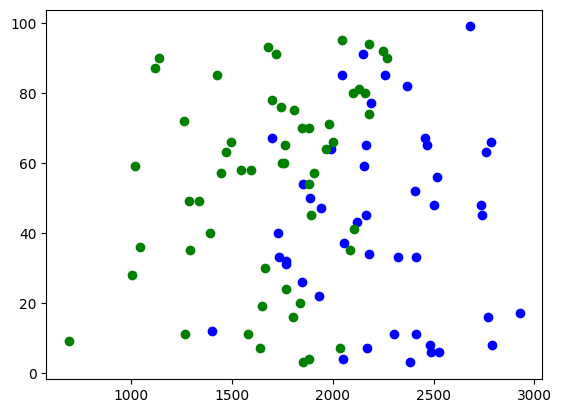

In [ ]:
y = house_prices["pricy"].values
# Grab two feature columns that we'll train on.
exp_sqft = house_prices["square_feet"].where(house_prices["pricy"] == 1)
che_sqft = house_prices["square_feet"].where(house_prices["pricy"] == 0)

exp_rooms = house_prices["num_rooms"].where(house_prices["pricy"] == 1)
che_rooms = house_prices["num_rooms"].where(house_prices["pricy"] == 0)

exp_age = house_prices["age"].where(house_prices["pricy"] == 1)
che_age = house_prices["age"].where(house_prices["pricy"] == 0)

exp_dist = house_prices["distance_to_city(km)"].where(house_prices["pricy"] == 1)
che_dist = house_prices["distance_to_city(km)"].where(house_prices["pricy"] == 0)

plt.scatter(exp_sqft[0:100], exp_age[0:100], color='blue', marker='o', label='sepal length vs. petal length in setosa')
plt.scatter(che_sqft[0:100], che_age[0:100], color='green', marker='o', label='sepal length vs. petal length in versicolor')
plt.show()

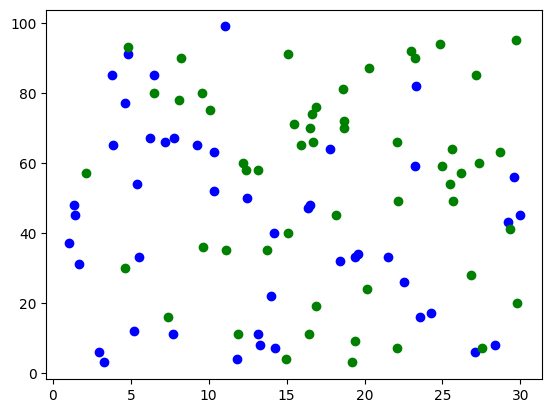

In [ ]:
plt.scatter(exp_dist[0:100], exp_age[0:100], color='blue', marker='o', label='sepal length vs. petal length in setosa')
plt.scatter(che_dist[0:100], che_age[0:100], color='green', marker='o', label='sepal length vs. petal length in versicolor')
plt.show()

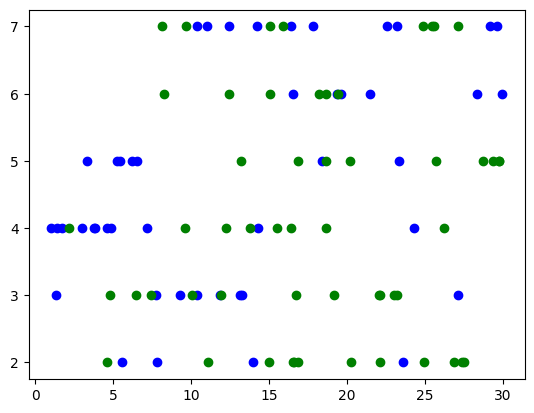

In [ ]:
plt.scatter(exp_dist[0:100], exp_rooms[0:100], color='blue', marker='o', label='sepal length vs. petal length in setosa')
plt.scatter(che_dist[0:100], che_rooms[0:100], color='green', marker='o', label='sepal length vs. petal length in versicolor')
plt.show()

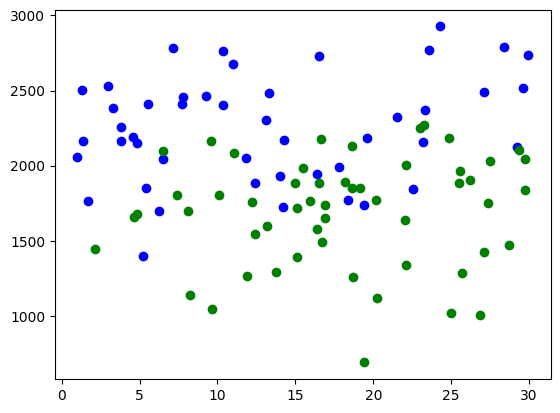

In [ ]:
plt.scatter(exp_dist[0:100], exp_sqft[0:100], color='blue', marker='o', label='sepal length vs. petal length in setosa')
plt.scatter(che_dist[0:100], che_sqft[0:100], color='green', marker='o', label='sepal length vs. petal length in versicolor')
plt.show()

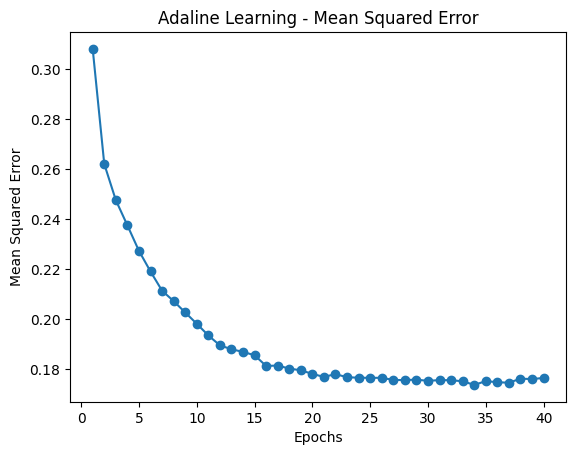

In [ ]:
# distance and square foot, and distance and age seem like winners
# the learning rate is tiny!!!! That's because our raw linear data will produce large weight updates and blow up.
y = house_prices["pricy"].values
X = house_prices[["distance_to_city(km)", "square_feet"]].values
adaline = AdalineSGD(n_iter=40, eta=0.00000005).fit(X, y)
plt.plot(range(1, len(adaline.losses_)+1), adaline.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Adaline Learning - Mean Squared Error')
plt.show()

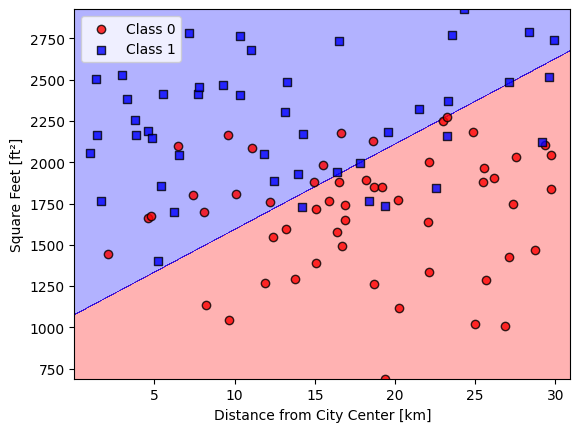

In [ ]:
plot_decision_regions(X[:100], y[:100], classifier=adaline)
plt.ylabel('Square Feet [ft²]')
plt.xlabel('Distance from City Center [km]')
plt.legend(loc='upper left')
plt.show()
# class 1 are expensive houses, class 0 are cheap houses